# PROJECT 2 - STOCK MARKET API PROJECT

In [ ]:
%pip install python-dotenv plotly nbformat

### Load the API key from .env file

In [ ]:
from dotenv import load_dotenv
load_dotenv()

In [ ]:
import os
api_key = os.getenv("API_KEY")

### 1. Get the vompany stock symbol

In [ ]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank Of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

response.json()

### Get daily stock details for SBIN.BSE

In [ ]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [ ]:
data

In [ ]:
data.keys()

In [ ]:
daily = data["Time Series (Daily)"]

In [ ]:
import pandas as pd
df = pd.DataFrame(daily).T
df

In [ ]:
df.dtypes

In [ ]:
df = df.astype(float).round(2)

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
# Convert index to datatime
df.index = pd.to_datetime(df.index)
df.index

In [ ]:
df

In [ ]:
df.index.name = "Date"

In [ ]:
df

In [ ]:
df.to_csv("SBIPrice.csv")

In [ ]:
df.columns

### Visulize the data with Candlesrick chart

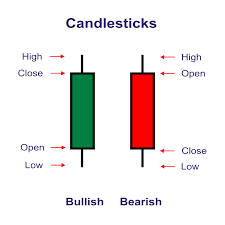

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            open = df["1. open"],
            high = df["2. high"],
            low = df["3. low"],
            close = df["4. close"]
        )
    ]
)
fig.update_layout(width=1200, height=800)

fig.show()

### Create a class to get stock details for any stock

In [ ]:
class StockAPI:

    def __init__(self):
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": os.getenv("API_KEY"),
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def search_symbol(self, company_name):
        querystring = {
            "datatype": "json",
            "keywords": company_name,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        return response.json()

    def get_stock_data(self, symbol):
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(url, headers=self.headers, params=querystring)
        data = response.json()["Time Series (Daily)"]
        df = pd.DataFrame(data).T
        df = df.astype(float).round(2)
        df.index = pd.to_datetime(df.index)
        df.index.name = "Date"
        return df

    def plot_candlestick(self, df):
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )
        fig.update_layout(width=1200, height=800)
        fig.show()

In [ ]:
client = StockAPI()

In [ ]:
client.search_symbol(company_name="HDFC BANK")

In [ ]:
df2 = client.get_stock_data(symbol="HDFCBANK.BSE")

In [ ]:
df2

In [ ]:
df2.to_csv("HDFCPrice.csv")

In [ ]:
client.plot_candlestick(df2)

### Get the details for Tesla stock from US

In [ ]:
client.search_symbol(company_name="Tesla")

In [ ]:
df3 = client.get_stock_data(symbol="TSLA")

In [ ]:
df3

In [ ]:
client.plot_candlestick(df3)